In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
df = pd.read_csv("nba_players_shooting.csv", index_col=0)

**Create Efficiency Dataframe**

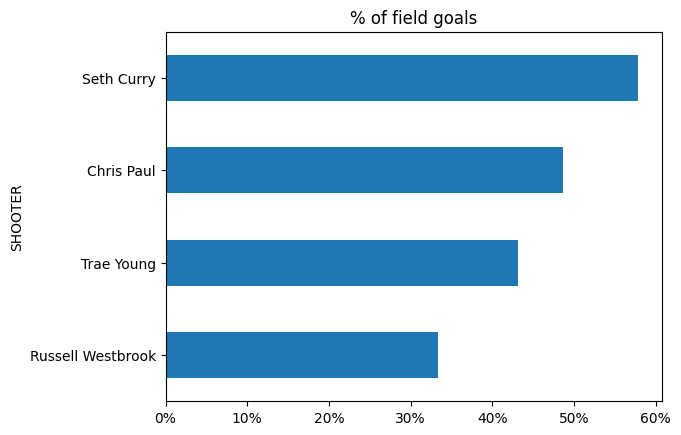

In [119]:
( df
 .replace(['MADE','MISSED'],[1,0]) #replace MADE shots with 1 and MISSED with 0 
 .groupby('SHOOTER')               
 .SCORE                                                         
 .mean()                           
 .sort_values()                    
 .plot.barh()
)
import matplotlib.ticker as mtick 
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.title("% of field goals");
plt.savefig("FGpercentage.pdf", format="pdf", bbox_inches="tight")

**Create Efficiency vs Defender Dataframe**


In [126]:
( df
 .replace(['MADE','MISSED'],[1,0])     
 .groupby(['SHOOTER','DEFENDER'])      
 .SCORE                                
 .mean()                               
 .unstack()
 .fillna(value="--")
 .to_csv('FGPerc_VS_Def.csv')
)

**Courtview of Shots Made**

In [103]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=True):
    if ax is None:
        ax = plt.gca()
    outer_box = Rectangle((-12, -4.75), 24, 19, linewidth=lw, color=color,
                          fill=False)
    inner_box = Rectangle((-8, -4.75), 16, 19, linewidth=lw, color=color,
                          fill=False)
    free_throw_arc = Arc((0, 14.25), 16, 12, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    restrictedarea = Arc((0, 0), 10, 10, theta1=18, theta2=-195, linewidth=lw,
                     color=color)
    corner_three_left = Rectangle((-25, -4.75), 0, 14, linewidth=lw,
                               color=color)
    corner_three_right = Rectangle((25, -4.75), 0, 14, linewidth=lw, color=color)
    threepointline = Arc((0, 0), 53, 53, theta1=19, theta2=-199, linewidth=lw,
                    color=color)
    court_elements = [outer_box, inner_box, free_throw_arc,
                       restrictedarea, corner_three_left,
                      corner_three_right, threepointline]

    if outer_lines:
        outer_lines = Rectangle((-30, -4.75), 60, 47, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)
    for element in court_elements:
        ax.add_patch(element)

    return ax

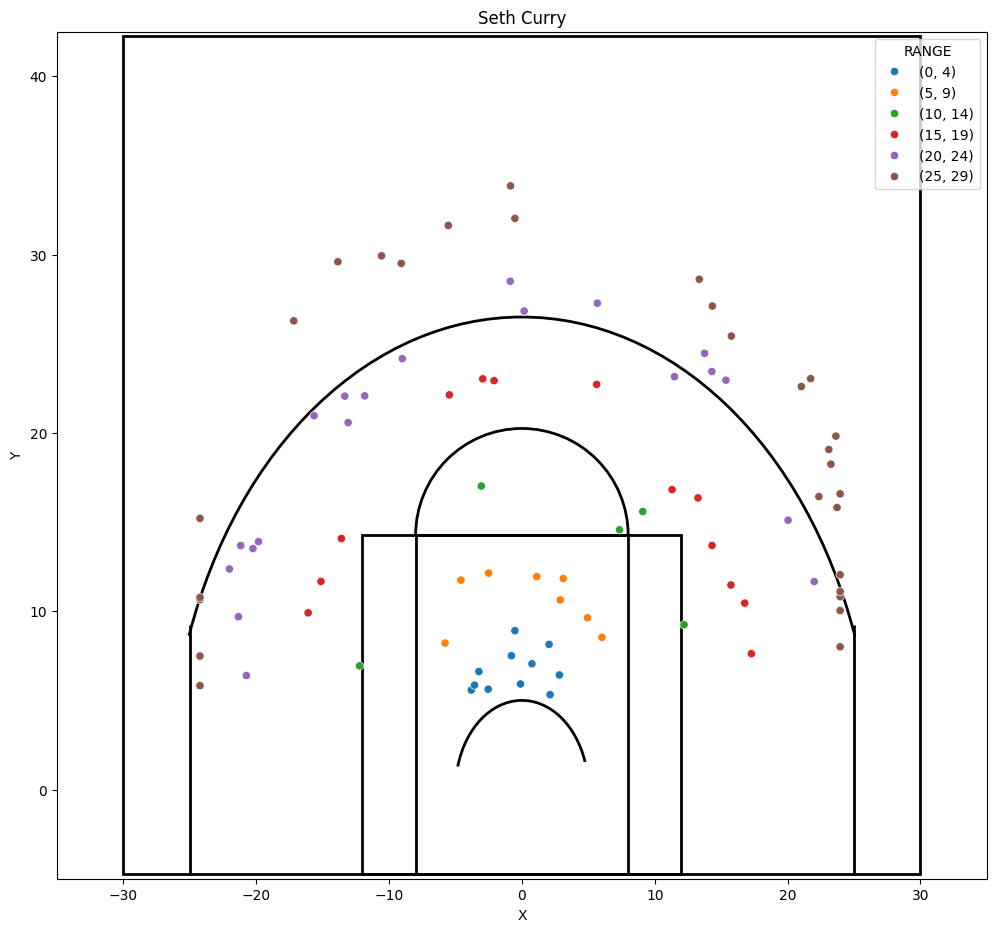

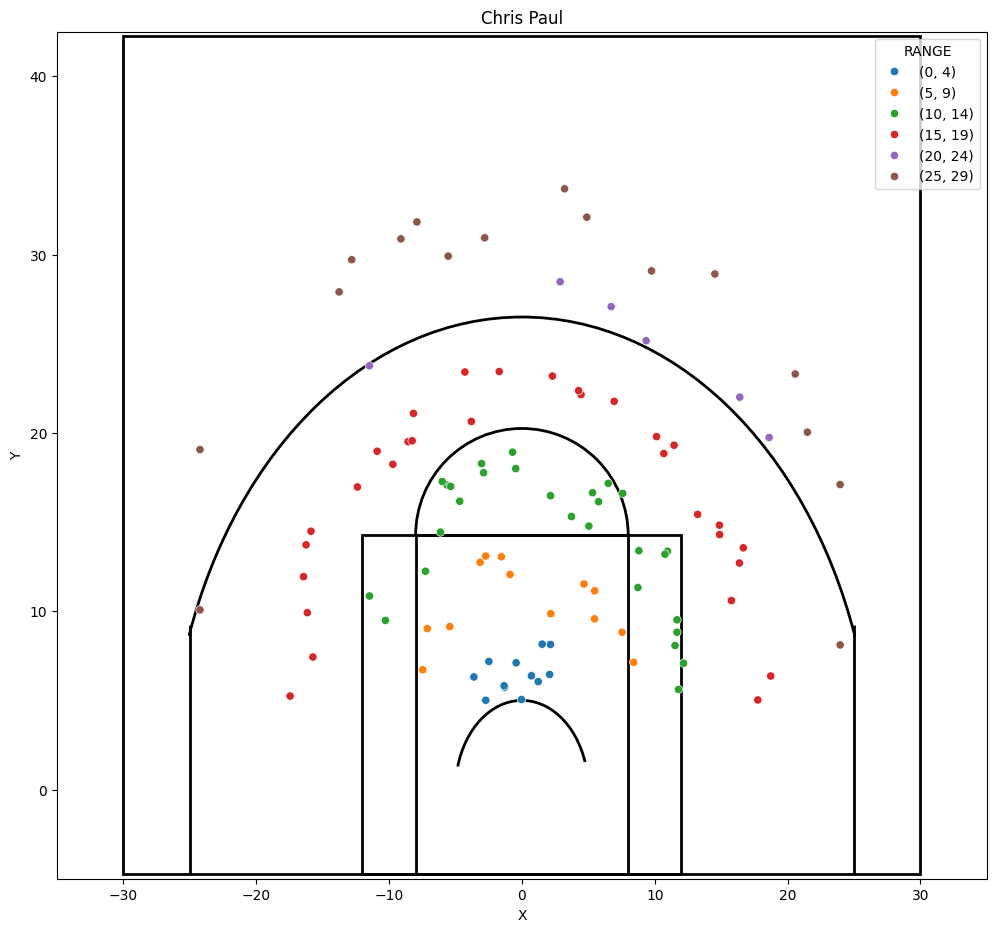

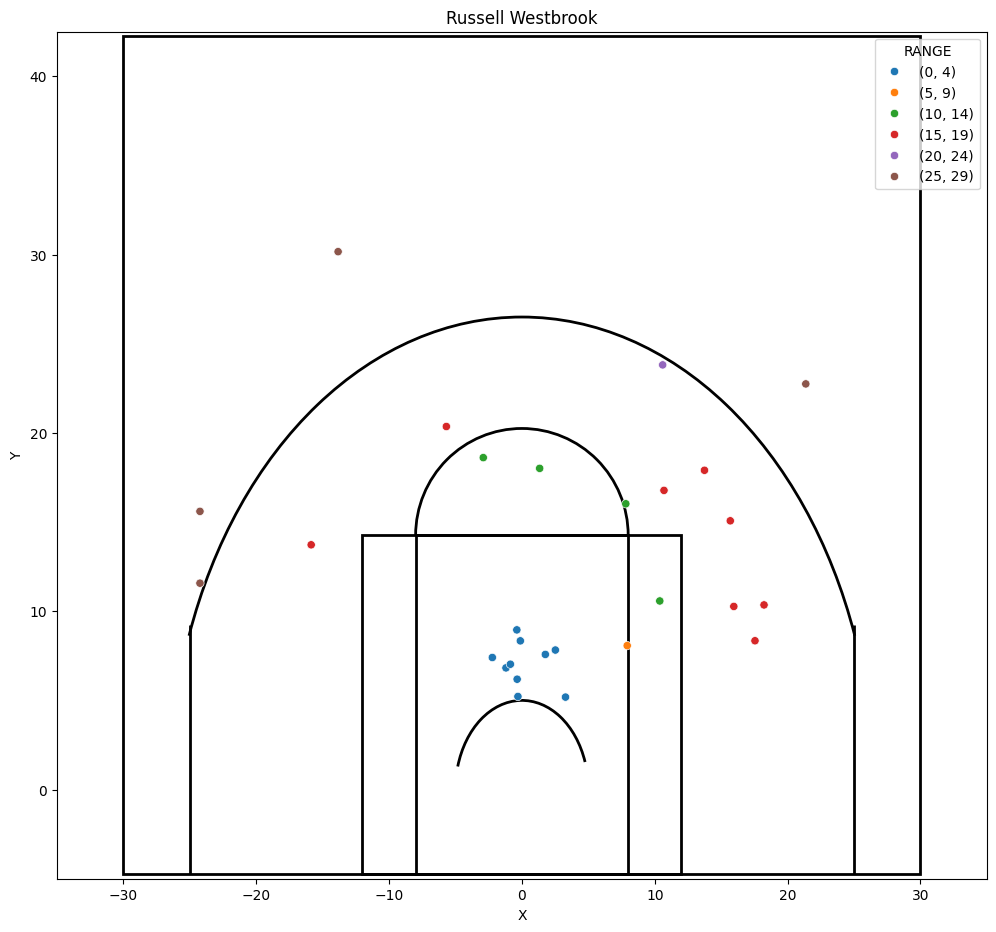

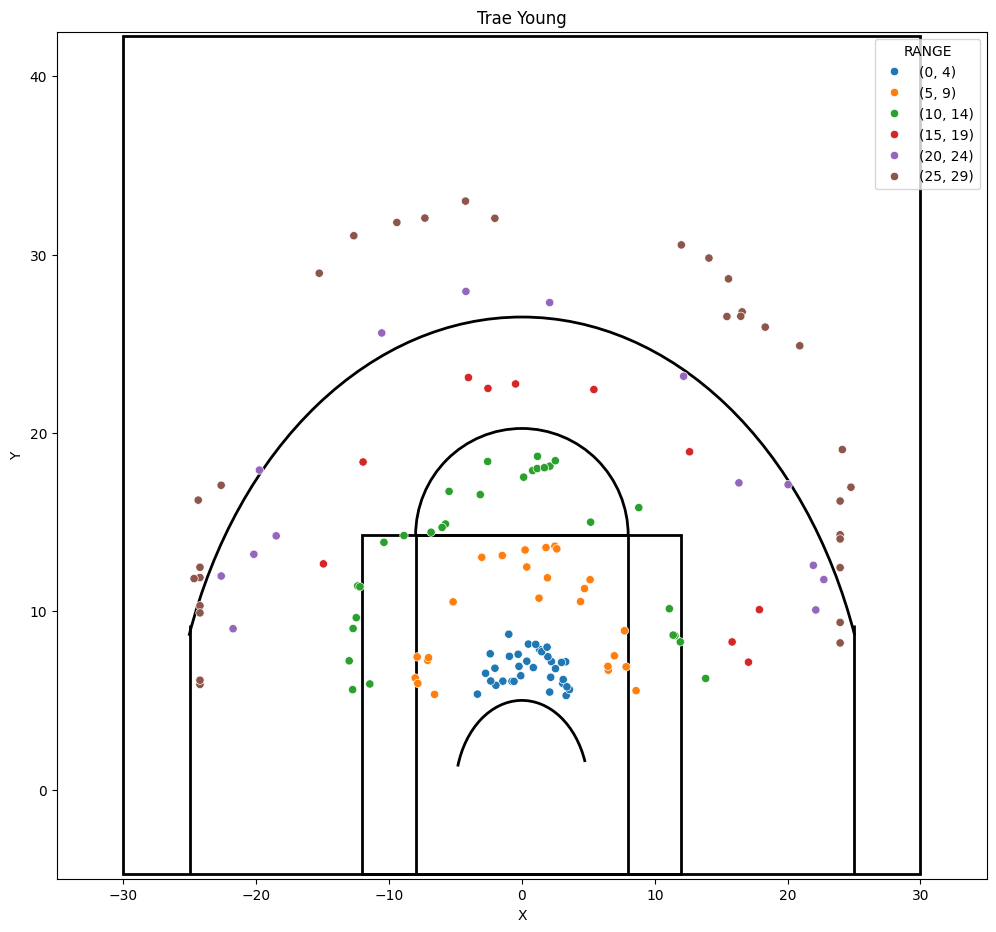

In [130]:

for i,shooter in enumerate(df.SHOOTER.unique()):
    # get the MADE shots for each SHOOTER
    plt.figure(figsize=(12,11))
    plt.xlim(-35,35)
    plt.ylim(-5,42.5)
    plt.title(shooter)
    draw_court()
    data = df.query("SHOOTER == @shooter & SCORE == 'MADE'")
    sns.scatterplot(data=data, x='X', y='Y', hue='RANGE')
    plt.savefig(shooter+" Made Shots.pdf", format="pdf", bbox_inches="tight")